Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# các phép đo error này nếu giá trị càng nhỏ tức là mô hình càng fit tốt với dữ liệu
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Đọc dữ liệu

In [ ]:
# loading the data from csv file to a pandas dataframe
parkinson_data = pd.read_csv("/content/parkinsons.csv")
print(parkinson_data)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2.555477  0.148569

[195 rows x 24 

Quan sát dữ liệu huấn luyện


In [ ]:
# getting was some statistical measures about the data
n= parkinson_data.describe()
print(n)

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]


nhận thấy cột mean đang chênh lệch data rất nhiều

In [ ]:
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

ko có gtrij null

In [ ]:
# distribution of target variable
parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1=> Parkinson's positive

0=> Healthy


In [ ]:
# nhóm dữ liệu dựa trên biến mục tiêu
n=parkinson_data.groupby('status').mean()
print(n)

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
status                                           ...                              
0        181.937771    223.636750    145.207292  ...  0.160292  2.154491  0.123017
1        145.180762    188.441463    106.893558  ...  0.248133  2.456058  0.233828

[2 rows x 22 columns]


Nhận thấy: những ng khỏe mạnh thì MDVP: Fo(Hz), MDVP: Fhi(Hz), MDVP: Flo(Hz) rất cao, các chỉ só khác se thấp và đối với những người bị bệnh thì các chỉ số sẽ ngược lại

Chuẩn bị dữ liệu huấn luyện

Tách feature & targe

In [ ]:
# feature
X = parkinson_data.drop(columns=['name','status'], axis=1) 
# targe
Y = parkinson_data['status']

In [ ]:
print(X.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 22 columns]


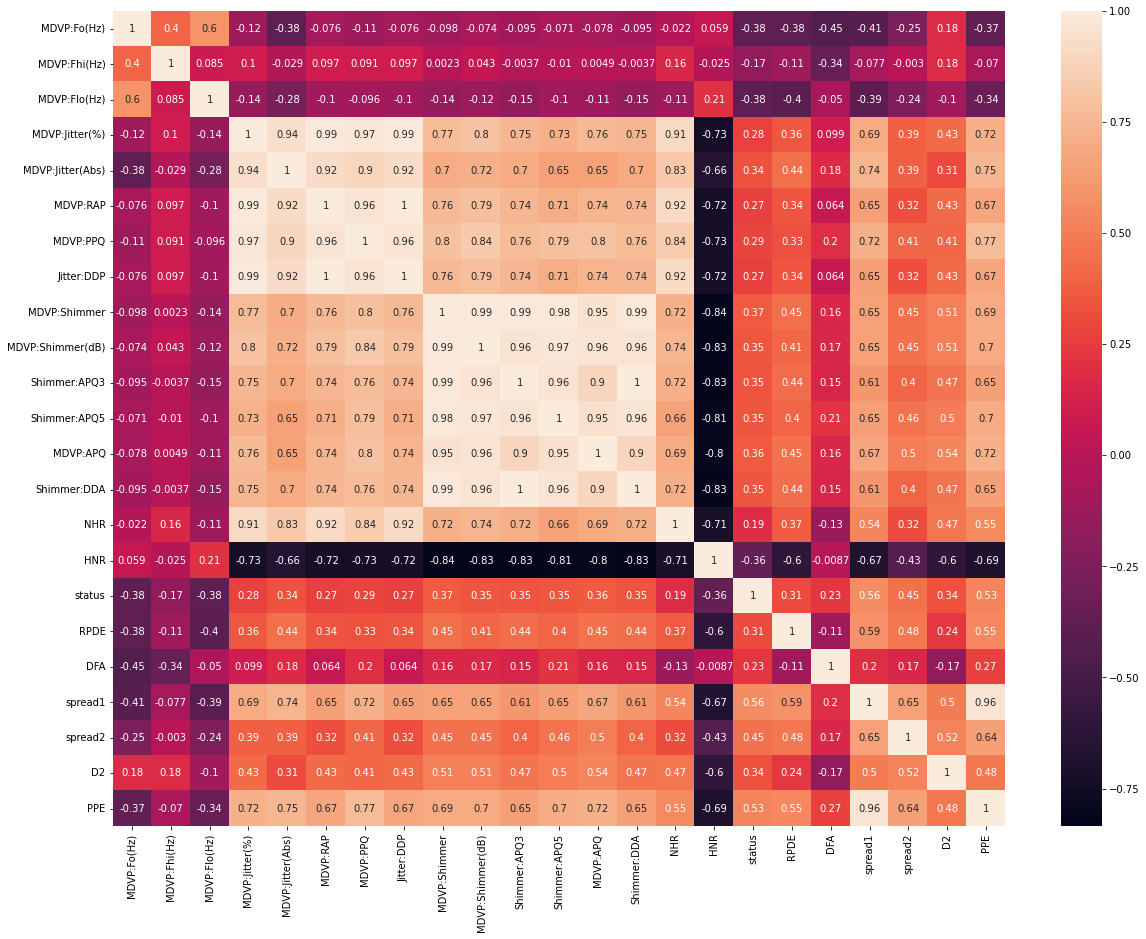

In [ ]:
corr = parkinson_data.corr() #Hệ số tương quan
import seaborn as sns
%matplotlib inline
# plot the heatmap
plt.figure(figsize=(20,15))
p = sns.heatmap(parkinson_data.corr(), annot=True)

In [ ]:
corr

Heatmap là biểu đồ sử dụng cường độ màu sắc để thể hiện độ lớn của giá trị. Khi đó các giá trị lớn sẽ được làm nổi bật bằng các vùng màu có cường độ ánh sáng mạnh và các giá trị nhỏ hơn sẽ được thể hiện bằng các mảng màu nhạt hơn

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (136, 22) (59, 22)


In [ ]:
print(X_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
149      202.632       565.740       177.258  ...  0.262281  2.910213  0.270173
180      150.440       163.441       144.736  ...  0.183218  2.264226  0.144105
54       108.807       134.656       102.874  ...  0.205558  1.986899  0.316700
159      127.930       138.752       112.173  ...  0.234196  2.103014  0.216638
16       144.188       349.259        82.764  ...  0.239764  2.264501  0.218164
..           ...           ...           ...  ...       ...       ...       ...
103      150.258       154.609        75.349  ...  0.089267  2.004055  0.113942
67       136.969       166.607        66.004  ...  0.205660  2.291558  0.226247
117      170.756       450.247        79.032  ...  0.372114  2.975889  0.282780
47       252.455       261.487       182.786  ...  0.200873  2.028612  0.086398
172      110.739       113.597       100.139  ...  0.192375  1.889002  0.174152

[136 rows x 22 columns]


Data Standardization

* Công dụng: Chuyển từ dữ liệu ban đầu đang khá to 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.20277786,  3.55007322,  1.46378495, ...,  0.37523479,
         1.38253798,  0.70950026],
       [-0.08490869, -0.40139205,  0.69127853, ..., -0.57555776,
        -0.31740397, -0.64646829],
       [-1.11208247, -0.68412437, -0.30308418, ..., -0.30690231,
        -1.04720163,  1.20993771],
       ...,
       [ 0.41632981,  2.41567671, -0.86941153, ...,  1.69605993,
         1.55536714,  0.84509927],
       [ 2.43201619,  0.56163635,  1.59509347, ..., -0.36324299,
        -0.93743211, -1.26715615],
       [-1.06441596, -0.89097029, -0.36804959, ..., -0.46543789,
        -1.3048217 , -0.32328725]])

MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.66541113, 0.94633434, 0.65054968, ..., 0.57630808, 0.7470631 ,
        0.46731755],
       [0.3615665 , 0.12512324, 0.46127791, ..., 0.39832605, 0.42250555,
        0.20621422],
       [0.11919288, 0.06636455, 0.21764915, ..., 0.44861656, 0.2831706 ,
        0.56368106],
       ...,
       [0.47983955, 0.71057901, 0.07889331, ..., 0.82355775, 0.78006011,
        0.4934283 ],
       [0.95546422, 0.32526409, 0.68272157, ..., 0.43806996, 0.30412809,
        0.08669547],
       [0.13044035, 0.02337691, 0.20173197, ..., 0.41893976, 0.23398507,
        0.26844549]])

Model Training

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

  plt.legend(loc="best")
  return plt

  
  """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
  

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std


Với c=3 và nomalization ta thấy độ chính xác tăng là 0.85476

Với c=100 và nomalization ta thấy độ chính xác tăng là 0.86904

In [ ]:
lgt = LogisticRegression(C=50)
# Sử dụng phương thức ".fit" để training
lgt.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation 

In [ ]:
cv = KFold(n_splits = 10, random_state = 1, shuffle=True)
scores = cross_val_score(lgt, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance, std là độ lệch chuẩn, mean: giá trị trung bình
print('Accuracy: ',"{:.3%}".format(mean(scores)))

Accuracy:  83.429%


In [ ]:
X_train_prediction = lgt.predict(X_train)
training_data_accuracy = lgt.predict(X_test)
print(f"MSE on training: {mean_squared_error(Y_train,X_train_prediction):.3f}, on testing: {mean_squared_error(Y_test, training_data_accuracy):.3f}")
print(f"MAE on training: {mean_absolute_error(Y_train, X_train_prediction):.3f}, on testing: {mean_absolute_error(Y_test, training_data_accuracy):.3f}")

MSE on training: 0.151, on testing: 0.143
MAE on training: 0.151, on testing: 0.143


Accuracy Score

2. SVM

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=250)
# Sử dụng phương thức ".fit" để trainingX_train_prediction
svm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=250, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Model Evaluation

In [ ]:
cv = KFold(n_splits = 10, random_state = 1, shuffle=True)
scores = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: ',"{:.3%}".format(mean(scores)))

Accuracy:  82.967%


Accuracy Score

In [ ]:
x_test_prediction=svm.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,x_test_prediction)

In [ ]:
print('Accuracy: ',"{:.3%}".format(mean(test_data_accuracy)))

Accuracy:  79.661%


In [ ]:
X_train_prediction = svm.predict(X_train)
training_data_accuracy = svm.predict(X_test)
print(f"MSE on training: {mean_squared_error(Y_train,X_train_prediction):.3f}, on testing: {mean_squared_error(Y_test, training_data_accuracy):.3f}")
print(f"MAE on training: {mean_absolute_error(Y_train, X_train_prediction):.3f}, on testing: {mean_absolute_error(Y_test, training_data_accuracy):.3f}")

MSE on training: 0.253, on testing: 0.224
MAE on training: 0.253, on testing: 0.224


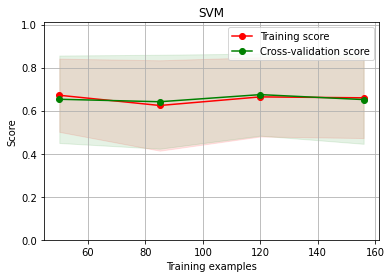

In [ ]:
title = "SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(svm, title, X, Y, ylim=(0.0, 1.01), cv=cv, n_jobs=-1)
plt.show()

3. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(ccp_alpha=136, criterion='gini')
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=136, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Model Evaluation

In [ ]:
cv = KFold(n_splits = 10, random_state = 1, shuffle=True)
scores = cross_val_score(decision_tree, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: ',"{:.3%}".format(mean(scores)))

Accuracy:  74.066%


Accuracy Score

In [ ]:
x_test_prediction=svm.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,x_test_prediction)
test_data_accuracy

0.7966101694915254

In [ ]:
print('Accuracy: ',"{:.3%}".format(mean(test_data_accuracy)))

Accuracy:  79.661%


In [ ]:
X_train_prediction = decision_tree.predict(X_train)
training_data_accuracy = decision_tree.predict(X_test)
print(f"MSE on training: {mean_squared_error(Y_train,X_train_prediction):.3f}, on testing: {mean_squared_error(Y_test, training_data_accuracy):.3f}")
print(f"MAE on training: {mean_absolute_error(Y_train, X_train_prediction):.3f}, on testing: {mean_absolute_error(Y_test, training_data_accuracy):.3f}")

MSE on training: 0.257, on testing: 0.220
MAE on training: 0.257, on testing: 0.220


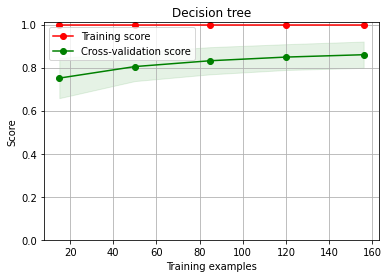

In [ ]:
title = "Decision tree"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(decision_tree, title, X, Y, ylim=(0.0, 1.01), cv=cv, n_jobs=-1)
plt.show()

P/s: Dựa vào kết quả accuracy của 3 mô hình là 

*   Model1 (Logistic Regression) : 84,8%
*   Model2 (SVM): 88.3%
*   Model3 (Decision tree): 83,6%
=> Để đánh giá tốt nhất độ chính xác dữ liệu ta nên sd model 2, sau đó là model 1 và cuối cùng là model 3





Phát triển


In [ ]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'tol': [100, 10 ,1, 0.1, 0.01, 0.001, 0.0001]};

In [ ]:
parameters2 = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30), 
              'min_samples_leaf': range(5,50,5), 'min_samples_split': range(20,200,20)}

In [ ]:
clf = LinearSVC(class_weight = 'balanced')
gridcv = GridSearchCV(clf, parameters).fit(X_train,Y_train)

In [ ]:
gridcv.best_params_

{'C': 100, 'tol': 0.1}

In [ ]:
clf = LogisticRegression(class_weight = 'balanced')
gridcv = GridSearchCV(clf, parameters).fit(X_train,Y_train)

In [ ]:
gridcv.best_params_

{'C': 0.001, 'tol': 1}

In [ ]:
clf = DecisionTreeClassifier(class_weight = 'balanced')
gridcv = GridSearchCV(clf, parameters2).fit(X_train,Y_train)

In [ ]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

Building a Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

In [ ]:
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

In [ ]:
prediction = lgt.predict(std_data)
print(prediction)

[0]


In [ ]:
if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

The Person does not have Parkinsons Disease
